In [47]:
# Load librariesimport numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
from time import time
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import struct

In [33]:
# Function for loading data
def load_mnist(path="/"):
    train_labels_path = os.path.join(path, "train-labels.idx1-ubyte")
    train_images_path = os.path.join(path, "train-images.idx3-ubyte")

    test_labels_path = os.path.join(path, "t10k-labels.idx1-ubyte")
    test_images_path = os.path.join(path, "t10k-images.idx3-ubyte")

    labels_path = [train_labels_path, test_labels_path]
    images_path = [train_images_path, test_images_path]

    labels = []
    images = []

    for path in zip(labels_path, images_path):
        with open(path[0], 'rb') as lbpath:
            magic, n = struct.unpack('>II', lbpath.read(8))
            lb = np.fromfile(lbpath, dtype=np.uint8)
            labels.append(lb)

        with open(path[1], 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
            images.append(np.fromfile(imgpath, dtype=np.uint8).reshape(len(lb), 784))

    return images[0], images[1], labels[0], labels[1]

In [48]:
# Load the dataset
X_train, X_test, Y_train, Y_test = load_mnist(path='MNIST')
print(f"Initial number of properties: {X_train.shape[1]}")
print(f"Examples for training: {X_train.shape[0]}")
print(f"Examples for test: {X_test.shape[0]}")

Initial number of properties: 784
Examples for training: 60000
Examples for test: 10000


In [35]:
# Scale the dataset
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [36]:
# Uses PCA on the dataset
pca = PCA(0.90)
start_time = time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time = time()
print(f"Final number of properties with a 0.90 threshold for variance: {X_train_pca.shape[1]}")
print(f"Time for the PCA: {round(end_time-start_time, 2)} seconds")

Final number of properties with a 0.90 threshold for variance: 87
Time for the PCA: 7.81 seconds


In [37]:
# Training of the Multilayer Perceptron
hl_size = (64, 64,)
mlp = MLPClassifier(hidden_layer_sizes=hl_size,
                    verbose=True,
                    solver='adam',
                    max_iter=2000,
                    learning_rate='adaptive',
                    alpha=0.01)

print(f"Size of the Multilayer Perceptron: {hl_size}")

start_time = time()
mlp.fit(X_train, Y_train)
end_time = time()

print(f"Time for the training: {round(end_time-start_time, 2)} seconds")

Size of the Multilayer Perceptron: (64, 64)
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Time for the training: 103.53 seconds


In [41]:
# Prediction of the Multilayer Perceptron
Y_pred_train = mlp.predict(X_train)
Y_prob_train = mlp.predict_proba(X_train)
Y_pred = mlp.predict(X_test)
Y_prob = mlp.predict_proba(X_test)


accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred)

loss_train = log_loss(Y_train, Y_prob_train)
loss_test = log_loss(Y_test, Y_prob)

print(f"Accuracy of the model: TRAIN={round(accuracy_train, 4)} TEST={round(accuracy_test, 4)}")
print(f"Log loss of the model: TRAIN={round(loss_train, 4)} TEST={round(loss_test, 4)}")

Accuracy of the model: TRAIN=0.9996 TEST=0.9778
Log loss of the model: TRAIN=0.003 TEST=0.092


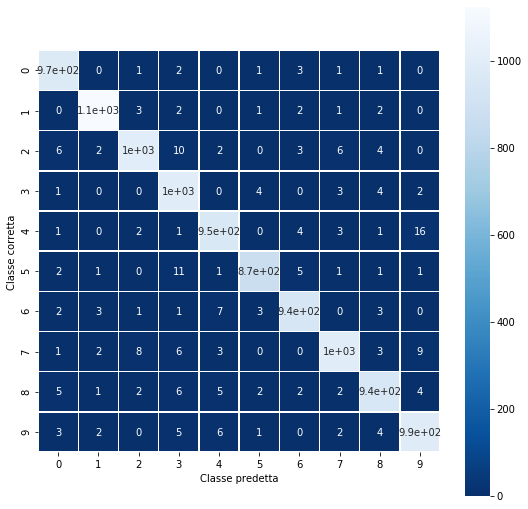

In [42]:
# Visualize the results
cm = confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, cmap='Blues_r', linewidths=.5, square=True)
plt.ylabel('Correct class')
plt.xlabel('Predicted class')
plt.show()

In [45]:
# Check the errors
count = 0
for i in range(0,len(X_test)):
    if(Y_test[i]!=Y_pred[i]):
        count+=1
        #plt.imshow(X_test[i].reshape([28,28]), cmap="gray")
        #plt.show()
print(f"Number of wrong images over the test set: {count}")
print(f"Number of total elements of the set: {X_test.shape[0]}")
print(f"Error in classification: {(100.0*count)/X_test.shape[0]}%")

Number of wrong images over the test set: 222
Number of total elements of the set: 10000
Error in classification: 2.22%
